#Importing lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Correlation plot

<Axes: >

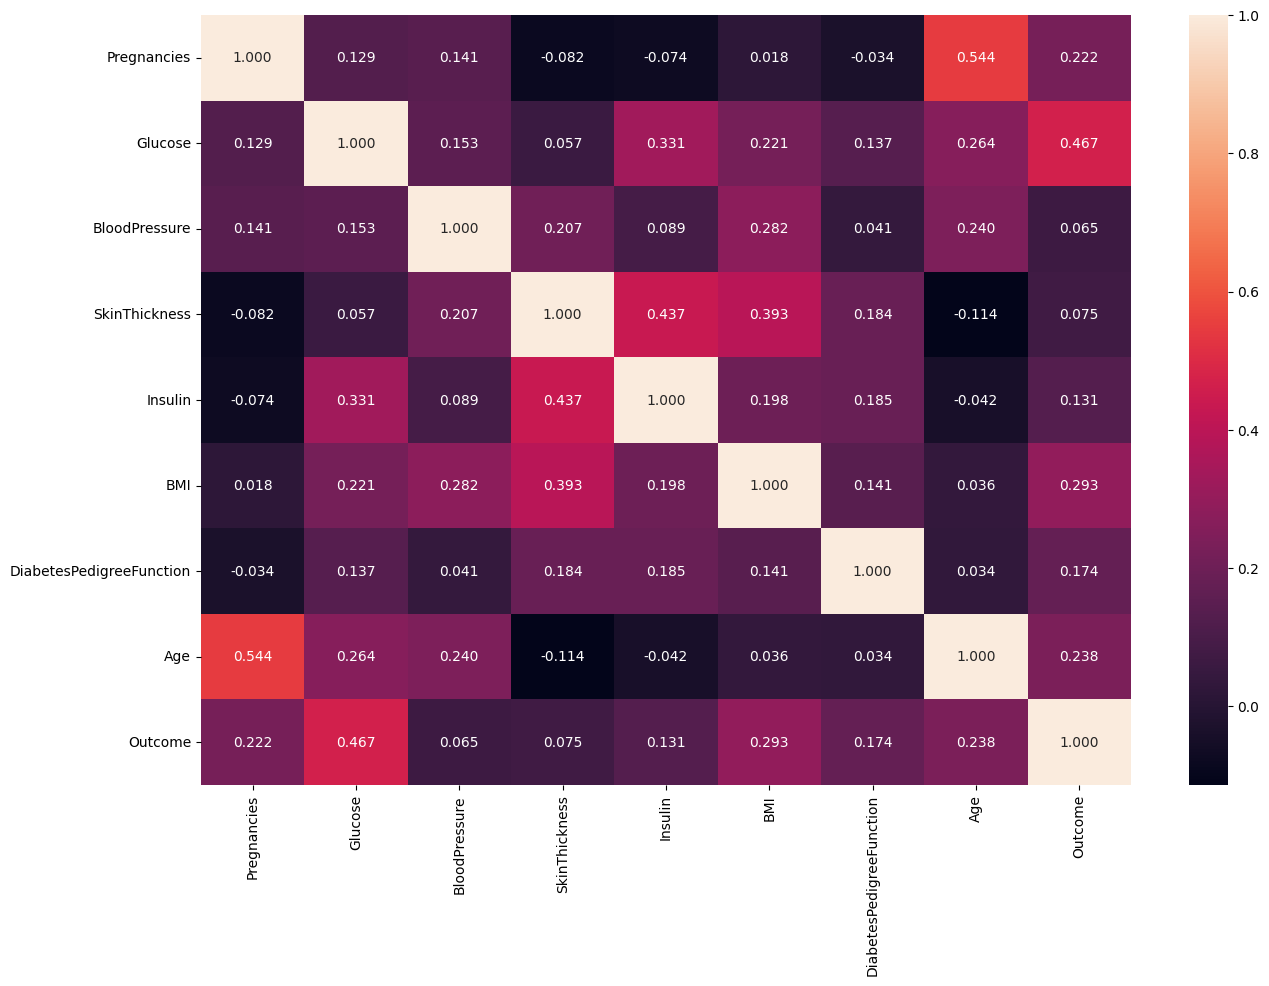

In [7]:
corr = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.3f')

#Exploring features and target variables

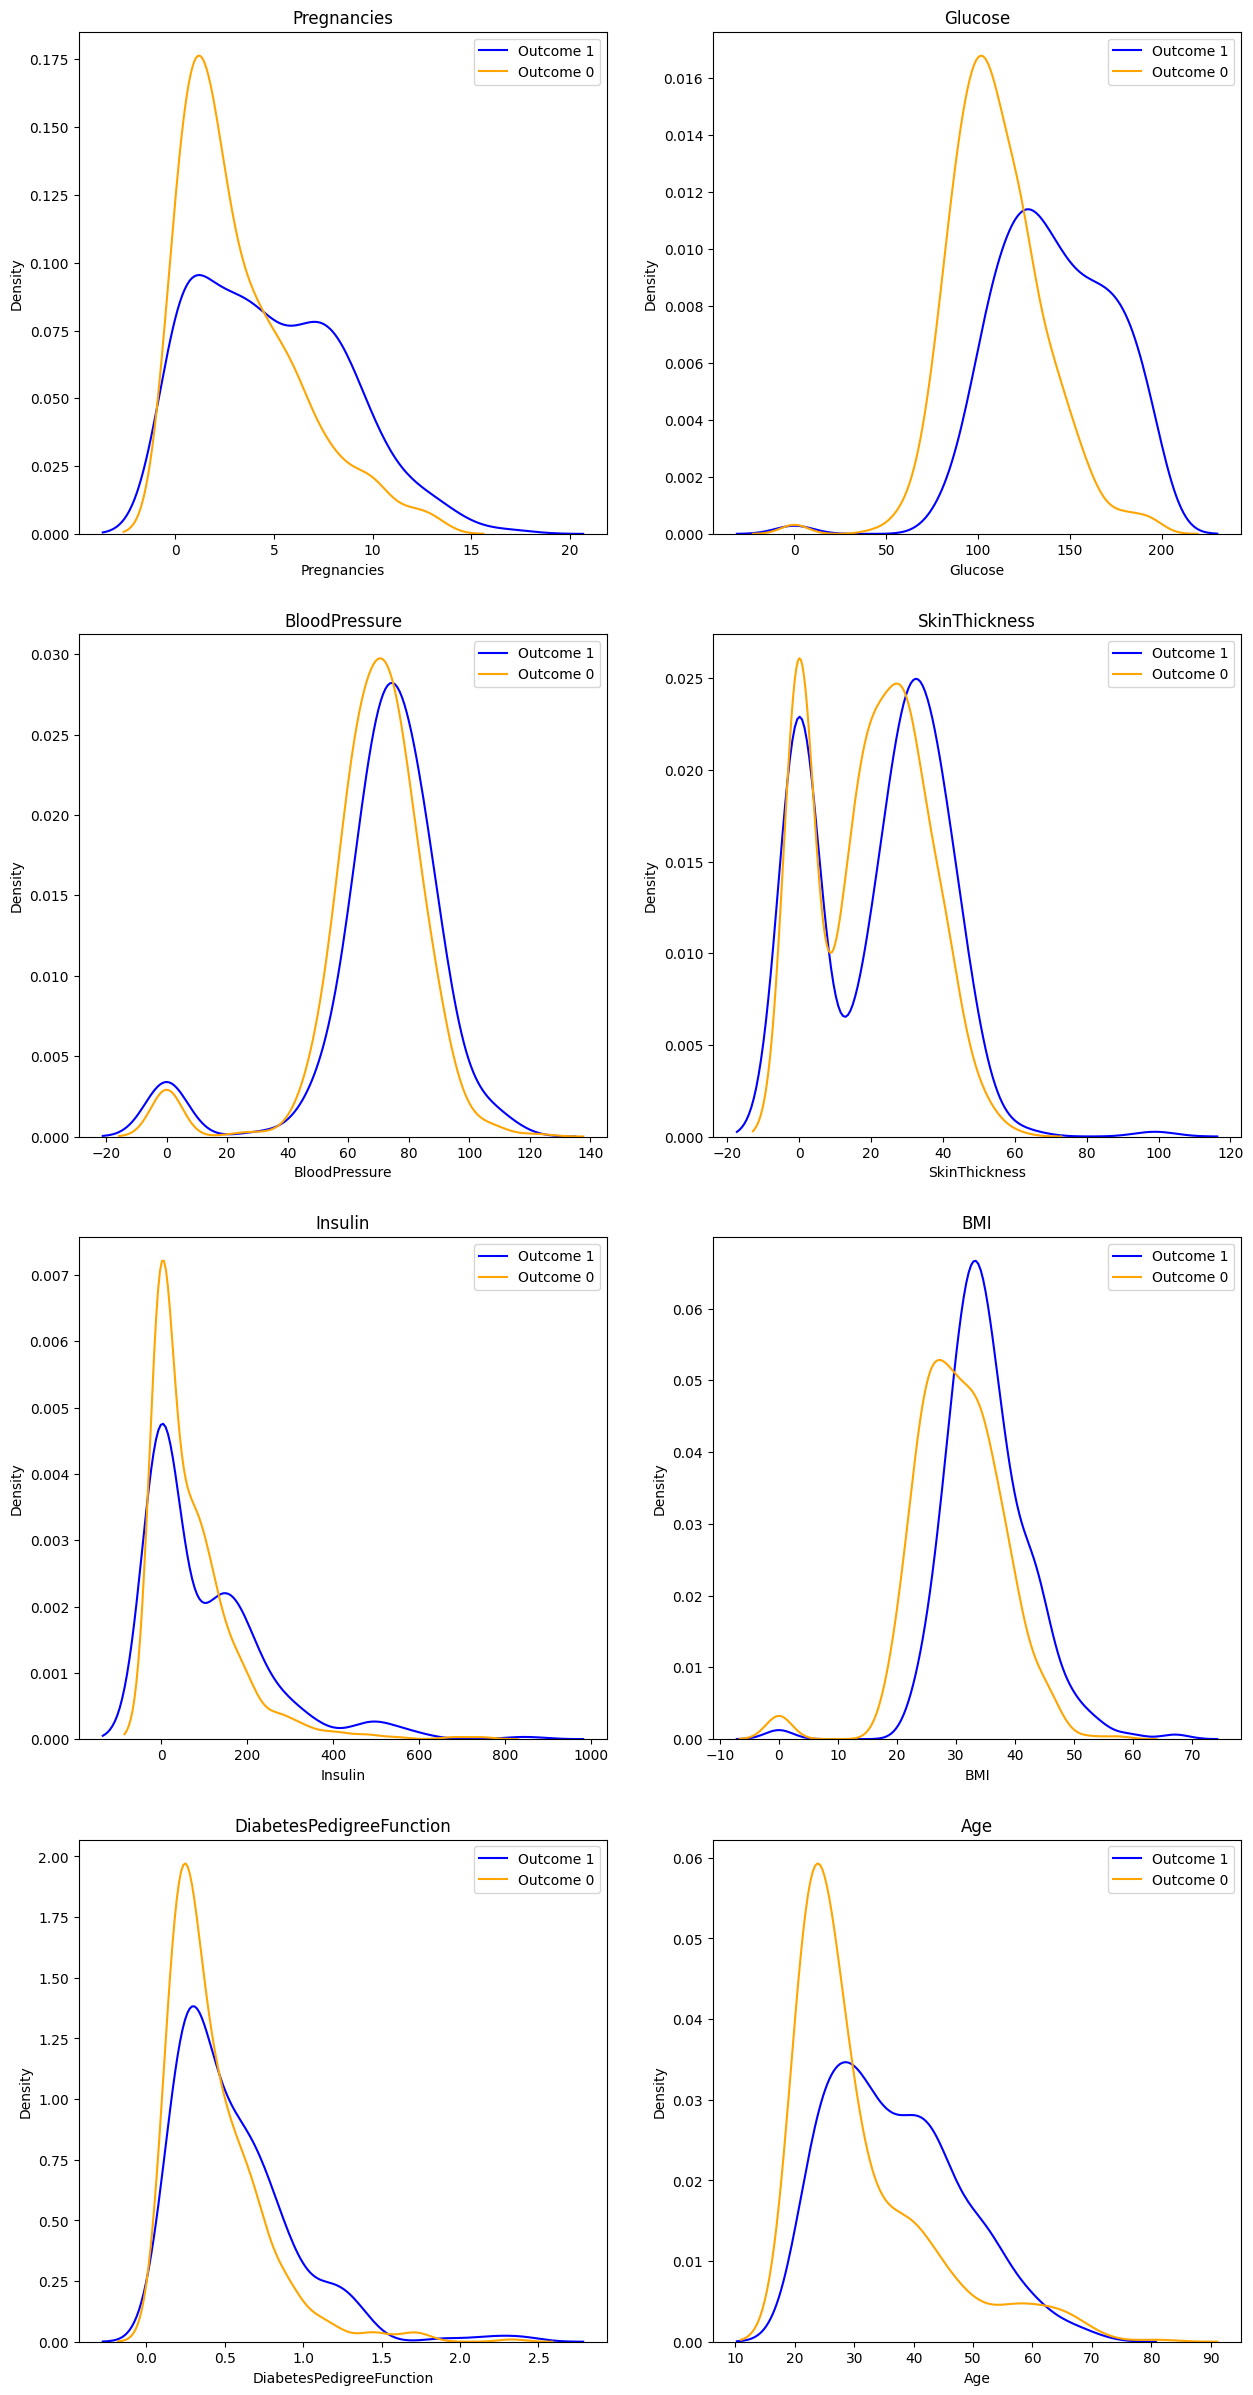

In [29]:
lists = dataset.columns.drop('Outcome').to_list()

i=0
fig, axes = plt.subplots(4, 2, figsize=(15, 30))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

for feature in lists:
    sns.kdeplot(dataset[feature][dataset['Outcome'] == 1], ax=axes[i], label='Outcome 1', color='blue')
    sns.kdeplot(dataset[feature][dataset['Outcome'] == 0], ax=axes[i], label='Outcome 0', color='orange')
    axes[i].set_title(feature)
    axes[i].legend()
    i+=1

#Replace 0 value with the mean of the respective features

In [30]:
for feature in lists:
    dataset[feature]=dataset[feature].replace(0,dataset[feature].mean())

In [31]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


#Splitting the dependent and independent variable

In [32]:
x = dataset.drop(['Outcome'],axis=1)
y = dataset['Outcome']

#Splitting training and testing dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
testing_accuracy = []
for i in range(1,21) :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)

    training_accuracy.append(knn.score(x_train,y_train)) 
    testing_accuracy.append(knn.score(x_test,y_test))

Text(0, 0.5, 'Accuracy')

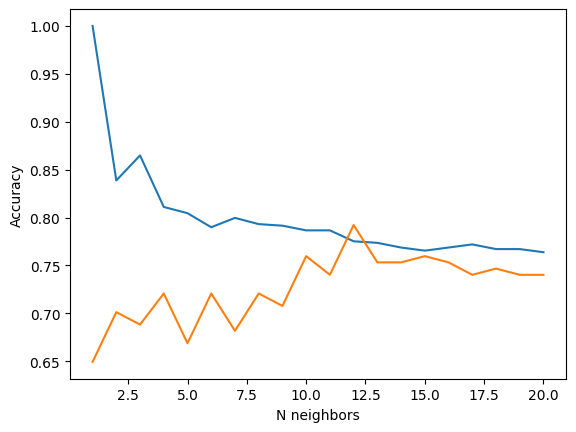

In [37]:
plt.plot(range(1,21),training_accuracy,label = "training_accuracy")
plt.plot(range(1,21),testing_accuracy,label = "testing_accuracy")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")

In [38]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.7752442996742671
0.7922077922077922


#Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.8322475570032574
0.7987012987012987


#Nueral Network

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train_scaled,y_train)
print(mlp.score(x_train_scaled,y_train))
print(mlp.score(x_test_scaled,y_test))

0.8143322475570033
0.7272727272727273


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
